# <center>Trilha de Data Science - Amigos da Poli</center>
# <center>Séries Temporais</center>
___

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="dsprecap"></a>
## Data Science Pipeline (DSP) recap
1. Definição do Problema / Definição do Escopo
2. Definição das Métricas de Sucesso
3. Definição dos Dados Necessários
4. Aquisição de Dados
5. Pré-processamento de Dados
6. Análise Exploratória de Dados (E.D.A.)
7. <i>Feature Engineering</i>
8. Construção e Avaliação do Modelo
9. Comunicação dos Resultados
10. Implantação
11. Monitoramento e Manutenção

**Essa aula tratará principalmente do passo 8, para os casos de modelos de séries temporais.**

<a id="intro"></a>
## 1. Introdução

Diferentemente dos modelos de classificação e regressão que vimos anteriormente, em um problema de série temporal, nosso objetivo é prever os resultados ao longo do tempo. Portanto, há diferenças na maneira como treinamos nosso modelo, onde próprio tempo pode explicar parcialmente o comportamento da variável objetivo.

Existem algumas maneiras pelas quais as variáveis ​​podem exibir padrões ao longo do tempo:

**Autocorrelação:** pode ser definida como a semelhança entre as observações do conjunto de dados em relação aos períodos de tempo entre eles. Basicamente, é a correlação entre conjuntos da mesma variável sobrepostos em diferentes períodos de tempo.

**Sazonalidade:** refere-se a flutuações periódicas. Ele pode ser identificado por meio de funções de autocorrelação. Por exemplo, o consumo de eletricidade é alto durante o dia e baixo durante a noite, ou as vendas online aumentam durante o Natal antes de desacelerar novamente.

**Estacionariedade:** é uma característica importante das séries temporais, que se diz estacionária quando suas propriedades estatísticas são estáveis. Isso significa que sua média e variância são constantes e sua covariância é independente do tempo. Isso não é verdade, por exemplo, para variáveis ​​que mudam tendências globais. Tomemos, por exemplo, o preço dos alimentos: na medida em que a inflação incorpora a depreciação da moeda, o preço dos produtos tende a subir em média.


<a id="ts_pandas"></a>
## 2. Séries Temporais e Pandas

Neste capítulo vamos fazer algumas análises e manipulações de séries temporais. Para isso, usaremos novamente a biblioteca Pandas.

### 2.1. Leitura e visualização inicial

Primeiro, temos que dizer ao Pandas que estamos de fato trabalhando com séries temporais. Para fazer isso, precisamos definir o índice DataFrame para uma coluna de data. Abaixo, temos duas maneiras diferentes de fazer isso lendo os dados de uma série temporal de um csv.

Para esta primeira parte da aula, vamos usar a série histórica do preço de fechamento das ações do Google, que pode ser encontrada abaixo:

- [Conjunto de dados de preços de ações do Google] (https://drive.google.com/file/d/1HebDtFl-1yDgRqGe_O2BHI0q2jYsVk7B/view?usp=sharing)

In [ ]:
# importando pacotes
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
# carrega dados da série histórica do csv
google = pd.read_csv('/content/drive/My Drive/Aula 5 ADP/data/GOOG.csv')

# transforma coluna Data para datetime, de modo que o Pandas possa reconhecê-la
google.Date = pd.to_datetime(google.Date)

# define coluna Date como indice
google.set_index('Date', inplace=True)
google.info()
google.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-07-10 to 2019-07-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-10,564.360535,575.011292,563.463013,569.536316,569.536316,1356700
2014-07-11,570.344116,579.259644,569.855469,577.594238,577.594238,1621700
2014-07-14,581.004822,583.607727,576.447388,583.268616,583.268616,1854000
2014-07-15,584.136230,584.201050,574.981384,583.178894,583.178894,1623000
2014-07-16,586.390076,586.788940,580.605957,581.064697,581.064697,1397100


Como você pode ver, o DataFrame tem um DatetimeIndex, de 10/07/2014 a 09/07/2019, e isso é o suficiente para o Pandas entender que estamos lidando com séries temporais. Na verdade, cada coluna pode ser considerada uma série temporal; elas apenas estão no mesmo DataFrame com um índice comum.

Abaixo temos a segunda forma de ler os dados do TS, agora diretamente no método ```.read_csv ()```.

In [ ]:
# lê o csv indicando que a coluna Date deve ser carregada com tipo data e usada como índice
google = pd.read_csv('/content/drive/My Drive/Aula 5 ADP/data/GOOG.csv', parse_dates=['Date'], index_col='Date')
google.info()
google.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-07-10 to 2019-07-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-10,564.360535,575.011292,563.463013,569.536316,569.536316,1356700
2014-07-11,570.344116,579.259644,569.855469,577.594238,577.594238,1621700
2014-07-14,581.004822,583.607727,576.447388,583.268616,583.268616,1854000
2014-07-15,584.136230,584.201050,574.981384,583.178894,583.178894,1623000
2014-07-16,586.390076,586.788940,580.605957,581.064697,581.064697,1397100


Como você pode ver, obtivemos os mesmos resultados fazendo isso em apenas uma linha de código.

Agora vamos tentar ver nossos dados. É muito simples fazer isso agora, basta chamar o método plot diretamente no DataFrame.

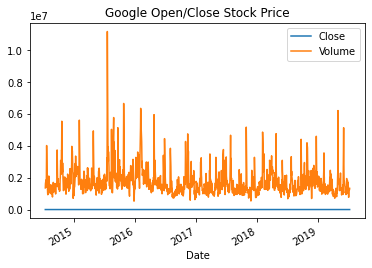

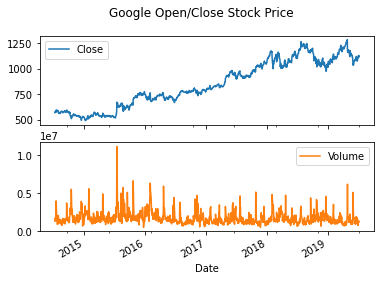

In [ ]:
# plota duas séries temporias em mesmo plot
google[['Close', 'Volume']].plot(title='Google Open/Close Stock Price')

# plota duas séries temporais em plots distintos
google[['Close', 'Volume']].plot(title='Google Open/Close Stock Price', subplots=True)

# imprime plots
plt.show()

Traçar duas séries no mesmo gráfico pode ser ruim se as duas séries têm magnitude diferente, como aconteceu no primeiro caso. A coluna Close acaba sendo uma linha reta já que o Volume é muito maior. Por causa disso, podemos separar os dois apenas adicionando o parâmetro ```subplots = True``` à instrução plot.

### 2.2. Frequências

Uma coisa importante sobre as séries temporais é a frequência. É o que define o intervalo de tempo entre dois registros consecutivos de uma série temporal. Ao definir uma frequência, o pandas cria todas as datas que correspondem a essa frequência no intervalo de seus dados. As frequências podem ser:
- H para Horário
- D para Diário
- B para Dias Úteis
- W para Semanal
- M para Mensal
- Q para Trimestral
- A para Anual

Vamos ver como isso funciona.

In [ ]:
# define frequência diária
google_daily = google[['Close']].asfreq('D')
google_daily.info()
google_daily.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2014-07-10 to 2019-07-09
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1258 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


,Close
Date,
2014-07-10,569.536316
2014-07-11,577.594238
2014-07-12,NaN
2014-07-13,NaN
2014-07-14,583.268616


Como você pode ver, 12-07-2014 e 13-07-2014 foram inseridos para ter todos os dias, já que definimos a frequência para diário. Mas isso foi sábado e sexta-feira, então não há informações de bolsa para esses dias. Na verdade, existem quase 600 observações nulas por causa disso. Sabendo disso, é melhor usarmos a frequência dos dias úteis. Apenas por curiosidade, vamos ver como é a frequência anual.

In [ ]:
# define frequência de dias uteis
google_bdaily = google[['Close']].asfreq('B')
google_bdaily.info()

# define frequencia anual
google_annually = google[['Close']].asfreq('A')
print(google_annually.head())

# define frequencia anual com preenchimento com ultimo valor nulo
google_annually_ffill = google[['Close']].asfreq('A', method='ffill')
print(google_annually_ffill.head())

# define frequencia anual com preenchimento com zeros
google_annually_fvalue = google[['Close']].asfreq('A', fill_value=0)
print(google_annually_fvalue.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2014-07-10 to 2019-07-09
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1258 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB
                  Close
Date                   
2014-12-31   524.958740
2015-12-31   758.880005
2016-12-31          NaN
2017-12-31          NaN
2018-12-31  1035.609985
                  Close
Date                   
2014-12-31   524.958740
2015-12-31   758.880005
2016-12-31   771.820007
2017-12-31  1046.400024
2018-12-31  1035.609985
                  Close
Date                   
2014-12-31   524.958740
2015-12-31   758.880005
2016-12-31     0.000000
2017-12-31     0.000000
2018-12-31  1035.609985


Como pudemos ver, a frequência de dias úteis deixou cerca de 50 valores nulos que devem estar relacionados a feriados.

No caso de frequência anual, podemos ver que por padrão obtém o último dia de cada, gerando também alguns valores nulos. Mas podemos definir o atributo ```method``` para preencher os NAs com o último valor não nulo com `'ffill'` ou com o próximo valor não nulo com `'bfill'`. Se você quiser preencher com um valor, passe-o para ```fill_value``` como fizemos.

### 2.3. Interpolação

Como acabamos de ver, a mudança de frequências produz alguns NAs para os dados, uma vez que cria observações para alguns dias que não tinham valores anteriormente.

Também aprendemos que podemos usar os parâmetros ```fill_value``` e ``` method``` do método ```.asfreq ()``` para imputar um valor fixo ou o último/próximo valor não nulo aos NAs, respectivamente.

Outra coisa que podemos fazer para lidar com os NAs é interpolar. Basicamente, o que interpolar faz é fornecer valores para NAs seguindo uma regra e usando os valores não nulos mais próximos antes e depois de NA.

Por exemplo, digamos que temos esta lista com quatro valores: \[2, NA, NA 8 \]. Podemos substituir esses NAs interpolando-os pela regra *linear*, ou seja, assumindo que todos os valores seguem uma linha de 2 a 8. Com isso, terminamos com a lista \[2, 4, 6, 8 \].

Chamamos essa *regra* de ```method```, que é um parâmetro para ``` .interpolate () ```, que usamos na célula abaixo. Você pode ver todos os métodos disponíveis na [documentação] (https://pandas.pydata.org/pandas-doc/stable/reference/api/pandas.Series.interpolate.html).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97c0a8908>,
      dtype=object)

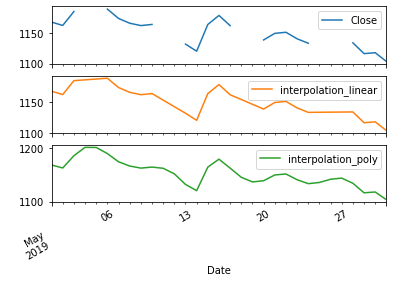

In [ ]:
# interpolação com método linear
google_daily['interpolation_linear'] = google_daily.Close.interpolate(method='linear')

# interpolação com método polinomial
google_daily['interpolation_poly'] = google_daily.Close.interpolate(method='polynomial', order=3)

# imprime resultados
google_daily[['Close','interpolation_linear','interpolation_poly']].loc['2019-05'].plot(subplots=True)

Como mostra o gráfico, tivemos os NAs na série temporal ```google_daily```. Em seguida, aplicamos interpolar com dois métodos diferentes, o que nos dá duas novas séries ligeiramente diferentes.

Não existe uma regra de ouro para escolher o método ao aplicar a interpolação. É importante entender cada método e pensar qual ajustaria melhor seus dados e, acima de tudo, experimentar!

### 2.4. Slicing

Uma prática muito frequente quando manipulamos dados de séries temporais é o corte do data frame, denominado 'slicing'. Com o Pandas, essa atividade é simplificada, de modo que pode-se simplesmente passar um ano, ano-mês ou intervalo entre colchetes para filtrar os dados. Você ainda pode usar ```.loc[]``` para selecionar uma data específica. Dê uma olhada abaixo.


734.150024


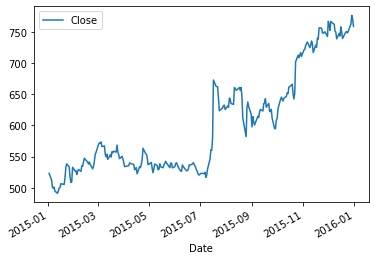

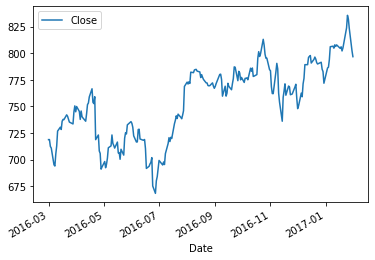

In [ ]:
# copia série
google_close = google[['Close']].copy()

# seleciona apenas dados de 2015
google_close['2015'].plot()

# seleciona da dos de março/2016 a fevereiro/2017. Note que é um intervalo fechado (inclusivo nas pontas)
google_close['2016-3': '2017-1'].plot()

# seleciona dados de uma data específica
print(google.loc['2016-6-1', 'Close'])

plt.show()

### 2.5. Deslocamento - _Shifting_

Frequentemente, ao usar séries temporais, precisamos comparar um valor com outro. Por exemplo: se eu quisesse saber quanto mudou o preço das ações de um dia para o outro? Aqui comumente deslocamos as séries temporais para facilitar a operação.

Basicamente, o deslocamento move todos os valores da série temporal em uma direção. Para nosso exemplo, poderíamos deslocar todos os valores em uma posição e, em seguida, usar operações para comparar esses valores. Abaixo, fazemos exatamente isso.

In [ ]:
# move valores um período pra frente
google_close['shifted'] = google_close.Close.shift() # default: periods=1

google_close.head(3)

,Close,shifted
Date,,
2014-07-10,569.536316,NaN
2014-07-11,577.594238,569.536316
2014-07-14,583.268616,577.594238


Como você pode ver, o primeiro valor dos dados deslocados é NaN, pois não havia nenhum registro anterior para ser colocado naquele local. E se quiséssemos deslocar para outra direção?

In [ ]:
# move valores um período para trás 
google_close['lagged'] = google_close.Close.shift(periods=-1)

google_close.tail(3)

,Close,shifted,lagged
Date,,,
2019-07-05,1131.589966,1121.579956,1116.349976
2019-07-08,1116.349976,1131.589966,1124.829956
2019-07-09,1124.829956,1116.349976,NaN


Mais uma vez, o último valor dos dados defasados é NaN porque não houve registros depois disso.

Agora podemos calcular a mudança entre um dia e outro com os dados deslocados.

In [ ]:
# divide preço de fechamento pela coluna deslocada para obter a variação
google_close['change'] = google_close.Close.div(google_close.shifted)

# subtrai 1 e multiplica por 100 para obter retorno percentual
google_close['return'] = google_close.change.sub(1).mul(100)

google_close.head()

,Close,shifted,lagged,change,return
Date,,,,,
2014-07-10,569.536316,NaN,577.594238,NaN,NaN
2014-07-11,577.594238,569.536316,583.268616,1.014148,1.414821
2014-07-14,583.268616,577.594238,583.178894,1.009824,0.982416
2014-07-15,583.178894,583.268616,581.064697,0.999846,-0.015383
2014-07-16,581.064697,583.178894,572.159119,0.996375,-0.362530


Fácil, não é? Na verdade, para diferença e mudança percentual, existem métodos predefinidos. Você só precisa passar por quantos períodos deseja que seus dados sejam deslocados. Dê uma olhada abaixo.

In [ ]:
# diferença absoluta entre dois dias adjacentes
google_close['diff'] = google_close.Close.diff()

# diferença absoluta para dois dias com distancia de 3 dias entre si
google_close['diff_3d'] = google_close.Close.diff(3)

# variação percentual entre dois dias adjacentes
google_close['pct_change'] = google_close.Close.pct_change().mul(100)

# variação percentual para dois dias com distancia de 3 dias entre si
google_close['return_3d'] = google_close.Close.pct_change(3).mul(100)

google_close[['Close', 'diff', 'diff_3d', 'return', 'pct_change', 'return_3d']].head()

,Close,diff,diff_3d,return,pct_change,return_3d
Date,,,,,,
2014-07-10,569.536316,NaN,NaN,NaN,NaN,NaN
2014-07-11,577.594238,8.057922,NaN,1.414821,1.414821,NaN
2014-07-14,583.268616,5.674378,NaN,0.982416,0.982416,NaN
2014-07-15,583.178894,-0.089722,13.642578,-0.015383,-0.015383,2.395383
2014-07-16,581.064697,-2.114197,3.470459,-0.362530,-0.362530,0.600847


Resample altera a frequência de seus dados para uma frequência inferior (downsampling) ou superior (upsampling). Upsampling não é muito comum e geralmente envolve interpolação ou outros métodos de preenchimento. Aqui, vamos nos concentrar na redução da resolução que é comumente usada com alguma função de agregação, como um agrupamento para uma série temporal.

O que acontece é que você passa uma frequência para o método ```.resample ()``` e ele agrupa todos os valores naquele novo período, então você pode aplicar uma função a ele, criando um único valor a partir deles. Isso geralmente é usado para fazer uma versão mais suave de sua série. Algumas frequências que aceitam resampling são:
- M por mês
- MS para início do mês
- BM para o mês comercial
- BMS para início do mês comercial

Veja a seguir onde calculamos a mediana de um período da semana e a média de um período que começa no primeiro dia útil do mês.

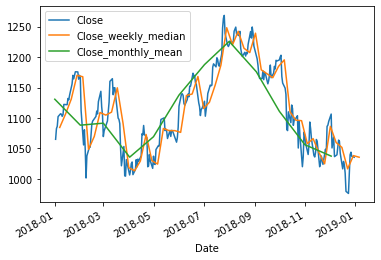

In [ ]:
# apenas dados de 2018
google_18 = google[['Close']]['2018']

# plot
axes = google_18.plot()

# aplica média e mediana
monthly_mean = google_18.resample('W').median().add_suffix('_weekly_median')
monthly_median = google_18.resample('BMS').mean().add_suffix('_monthly_mean')

# plota no mesmo eixo
monthly_mean.plot(ax=axes)
monthly_median.plot(ax=axes)

plt.show()

### 2.6. Funções de Janela - _Window Functions_

A função de janela é uma funcionalidade muito útil ao trabalhar com séries temporais. Basicamente, o que ele faz é, para cada registro da série temporal:
- 1. definir o registro como referência
- 2. identificar um subperíodo da série temporal (janela)
- 3. calcular métricas para a janela
- 4. criar uma nova série temporal das métricas

Com isso, existem dois tipos de janelas:
- Janelas Rolantes - _Rolling Window_: janela de tamanho fixo do registro atual que 'rola' conforme a referência muda
- Janelas de Expansão - _Expanding Window_: a janela contém todos os registros até a referência

A ideia é semelhante à redução da resolução, com a diferença de que nas funções de janela um registro pode aparecer em várias janelas (dependendo do tamanho da janela), enquanto na redução da resolução, cada registro aparece em um e apenas um compartimento, pois não há referência móvel na redução da resolução.

#### 2.6.1. Janelas Rolantes - _Rolling Windows_
As janelas rolantes (ou deslizantes) aplicam uma função a uma janela que desliza pela série. A imagem abaixo mostra uma visualização de como funciona uma janela deslizante, onde a cada iteração uma parte da série temporal é coberta pela janela. 

![rolling_window](https://docs.wavefront.com/images/5sec_moving_window.png)

Imagine que a cada iteração, uma operação é feita sobre a janela, como por exemplo o cálculo da média.


Vamos entender como isso é feito na prática. Para cada observação, calcularemos o valor médio das últimas 3 observações e também, separadamente, o valor médio dos últimos 3 dias.

In [ ]:
obs_window = google.Close.rolling(window=3).mean() # número fixo de observações (janela de observação)

period_window = google.Close.rolling(window='3D').mean() # período fixo (janela de período)

window = pd.concat([google.Close, obs_window.to_frame().add_suffix('_obs_mean'), period_window.to_frame().add_suffix('_per_mean')], axis=1)
window.info()
window.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-07-10 to 2019-07-09
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           1258 non-null   float64
 1   Close_obs_mean  1256 non-null   float64
 2   Close_per_mean  1258 non-null   float64
dtypes: float64(3)
memory usage: 79.3 KB


,Close,Close_obs_mean,Close_per_mean
Date,,,
2014-07-10,569.536316,NaN,569.536316
2014-07-11,577.594238,NaN,573.565277
2014-07-14,583.268616,576.799723,583.268616
2014-07-15,583.178894,581.347249,583.223755
2014-07-16,581.064697,582.504069,582.504069
2014-07-17,572.159119,578.800903,578.800903
2014-07-18,593.450684,582.224833,582.224833
2014-07-21,587.856018,584.488607,587.856018
2014-07-22,593.111633,591.472778,590.483825


Como podemos ver, o uso da janela de observação produz NAs até que tenhamos pelo menos o tamanho da janela para aplicar a média, enquanto a janela do período se ajusta até ter a janela do buraco para calcular a média.

Pode-se notar que existem algumas observações que possuem os mesmos valores para ```Close_obs_mean``` e ``` Close_per_mean``` e outras que não. A razão para isso são os dias sem informações de fechamento, já que a janela de observação pula esses dias enquanto a janela de período os conta. Portanto, se não houver dias sem negociação (finais de semana ou feriados) na janela do período, os dois valores serão iguais.

Podemos calcular múltiplas métricas com a mesma janela rolante usando ```agg``` ou armazenando a janela rolante em uma variável e usando-a várias vezes. Mostramos os duas formas:

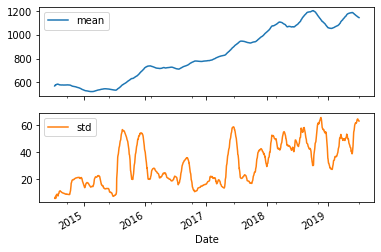

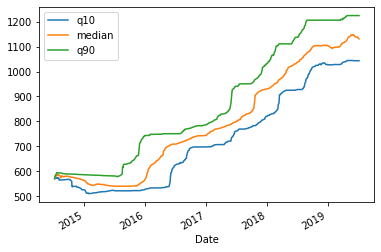

In [ ]:
# Método 1
r = google.Close.rolling('90D').agg(['mean', 'std'])    # calculo de média e desvio padrao
r.plot(subplots = True)                                 # plot separadamente

# Método 2
rolling = google.Close.rolling('360D')                  # armazena janela em variavel
q10 = rolling.quantile(.1).to_frame('q10')              # calculo do 10 quartil (q10)
median = rolling.median().to_frame('median')            # cálculo da mediana
q90 = rolling.quantile(.9).to_frame('q90')              # calculo do 90 quartil (q90)
pd.concat([q10, median, q90], axis=1).plot()            # plot

#### 2.6.2. Janelas de Expansão - _Expanding Windows_

As janelas de expansão levam todas as observações até a referência para calcular as métricas. Funciona com o método ```expanding``` que é semelhante ao ```rolling```, mas não precisa do tamanho da janela. 

Abaixo, usamos a janela de expansão para somar os valores em um DataFrame com dados inteiros de 1 a 10. Observe que fazemos isso de duas formas: com o método de expansão e com ```.cumsum()``` que serve como o agregação de ```.expanding()``` e ```.sum()```. Também temos ```.cumprod()```, ```.cummin()``` e ```.cummax()``` que seguem a mesma idéia.

In [ ]:
df = pd.DataFrame({'data': range(1, 11)})          # cria dataframe
df['expanding sum'] = df.data.expanding().sum()    # expanding()
df['cumulative sum'] = df.data.cumsum()            # cumsum()
df.head()

,data,expanding sum,cumulative sum
0,1,1.0,1
1,2,3.0,3
2,3,6.0,6
3,4,10.0,10
4,5,15.0,15


Em outro exemplo, podemos calcular os valores máximo e mínimo para o preço das ações do Google até esse ponto, como fazemos abaixo.

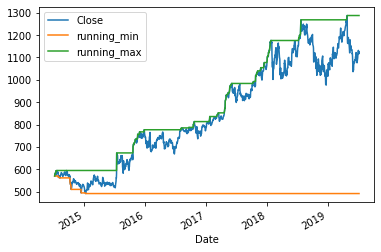

In [ ]:
google['running_min'] = google.Close.expanding().min()
google['running_max'] = google.Close.expanding().max()
google[['Close', 'running_min', 'running_max']].plot()

## 3. Divisão de treino/validação/teste
Embora esta seção já tenha sido apresentada nas duas últimas lições, aqui apresentamos algumas novas ideias para que possamos explicar a influência do tempo nas divisões de sets de treino, validação e teste.


### 3.1. Divisão Temporal
O impacto do tempo no comportamento dos dados é algo que devemos considerar para cada modelo, portanto, podemos (e devemos) aplicar o que discutiremos aqui aos problemas de classificação e regressão também. Só deixamos essa discussão para esta aula porque as séries temporais, como o nome diz, exibem comportamentos influenciados pelo tempo.

O principal problema com a divisão treino/teste que usamos antes é que ela é aleatória. Isso significa que escolhemos aleatoriamente um subconjunto de nossos dados para treinar e outro no qual testamos nosso modelo. Este método é baseado em uma forte suposição de que as observações são independentes entre si, o que significa que o resultado de uma observação não está correlacionado ao resultado de outras.

Mas ao usar a série temporal, isso deixa de ser verdade. Por exemplo, pegue o último gráfico que fizemos na seção anterior e tente informar o preço das ações do Google em 17/10/2018. Você não pode dizer o valor exato porque o gráfico é muito pequeno, mas o que você pode dizer é que está mais próximo de 1100 do que de 600 apenas porque o valor médio para o final de 2018 está em torno de 1100, enquanto o valor 600 não acontecia desde 2015. Os valores dos dados das séries temporais tendem a estar mais próximos dos valores das observações próximas em termos de tempo.

Nesse caso, usando a divisão aleatória, quando o modelo tenta prever uma observação de 2017 no conjunto de teste, ele teria uma estimativa melhor enviesada, pois viu os dados de 2014 a 2019 no conjunto de treinamento e os usou como uma pista, ficando boas as métricas de acurácia para esse modelo. Quando então colocamos esse modelo em produção, ele não terá mais essa pista, tornando a previsão mais difícil e as métricas de acurácia piores.

É por isso que devemos usar uma divisão temporal nos dados para criar os conjuntos de treino e teste. Escolhemos uma data de referência e usamos as observações antes disso para treinar e depois disso para testar. Fazendo isso, podemos assegurar que o modelo nunca viu no treinamento uma observação que ocorre depois daquela com que está sendo testado, como acontecerá na vida real.

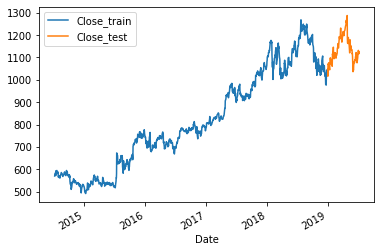

In [ ]:
train = google[:'2018-12']
test = google['2019-01':]

pd.concat([train.add_suffix('_train').Close_train, test.add_suffix('_test').Close_test], axis=1, sort=False).plot()

### 3.2. Validação Cruzada - _Cross Validation_

Assim que tivermos nosso conjunto de teste, precisamos usar um conjunto de validação ou validação cruzada para fazer o ajuste de hiperparâmetros, como fizemos em outras lições. <br>
No caso de um conjunto de validação, só precisamos dividir os dados temporariamente mais uma vez. <br>
Quando falamos sobre validação cruzada, na verdade temos dois métodos, assim como vimos nas funções de janela: rolar ou expandir. A ideia é exatamente a mesma, rolando usaremos um teste de tamanho fixo e rolaremos pelos dados, enquanto a expansão usará todos os dados anteriores. A imagem abaixo deve facilitar o entendimento.

![cv_split](https://1fykyq3mdn5r21tpna3wkdyi-wpengine.netdna-ssl.com/wp-content/uploads/2018/09/image6-e1536165830511-696x184.png)

Você pode ver como fazer os dois métodos de validação cruzada nas células a seguir.

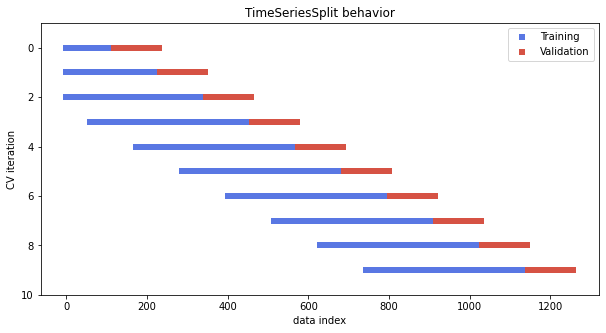

In [ ]:
# janela rolante
# utiliza histórico fixo para treino
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit(n_splits=10, max_train_size=400)

fig, ax = plt.subplots(figsize=(10, 5))
for index, (train, test) in enumerate(cv.split(google)):
    # Plota índices de treino e teste
    l1 = ax.scatter(train, [index] * len(train), c=[plt.cm.coolwarm(.1)], marker='_', lw=6)
    l2 = ax.scatter(test, [index] * len(test), c=[plt.cm.coolwarm(.9)], marker='_', lw=6)
    ax.set(ylim=[10, -1], title='TimeSeriesSplit behavior', xlabel='data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])

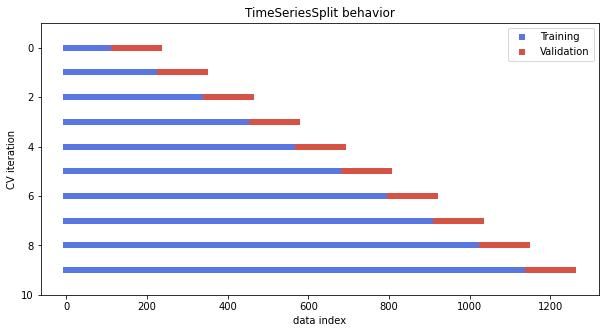

In [ ]:
# métodp de janela de expansão
# using all history to train
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit(n_splits=10)

fig, ax = plt.subplots(figsize=(10, 5))
for index, (train, test) in enumerate(cv.split(google)):
    # Plota índices de treino e teste
    l1 = ax.scatter(train, [index] * len(train), c=[plt.cm.coolwarm(.1)], marker='_', lw=6)
    l2 = ax.scatter(test, [index] * len(test), c=[plt.cm.coolwarm(.9)], marker='_', lw=6)
    ax.set(ylim=[10, -1], title='TimeSeriesSplit behavior', xlabel='data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])

O método da janela de expansão é usado com mais frequência, mas pode ser alterado para o método da janela rolante se a quantidade de dados for muito grande, para que o treinamento seja mais rápido.

### 3.3 Lembrando: Métricas de Avaliação do Modelo

Como você pode imaginar, as métricas para avaliar um modelo de série temporal são diferentes daquelas usadas para avaliar modelos de regressão. Para modelos de série temporal, geralmente usamos uma das seguintes métricas:
* MAPE (Mean Absolute Percentage Error)
* MAE (Mean Absolute Error)
* MSE (Mean Squared Error)
* RMSE (Root Mean Squared Error)
* R² (R Squared)


#### MAE (Mean Absolute Error)

MAE é a média da diferença absoluta entre os valores previstos e o valor observado. O MAE é uma pontuação linear, o que significa que todas as diferenças individuais são ponderadas igualmente na média. Por exemplo, a diferença entre 10 e 0 será o dobro da diferença entre 5 e 0. No entanto, o mesmo não é verdade para RMSE, apresentado abaixo. Matematicamente, é calculado usando esta fórmula:

![Imgur](https://cdn-images-1.medium.com/max/800/1*8DXbECB9pnKxTpIvuVD-vg.png)


#### RMSE (Root Mean Squared Error)

RMSE é uma métrica que também mede a magnitude média do erro. Porém, como os erros são elevados ao quadrado antes de serem calculados, o RMSE atribui um peso relativamente alto aos erros maiores. Isso significa que o RMSE é mais útil quando erros grandes (outliers) são particularmente indesejáveis

![Imgur](https://cdn-images-1.medium.com/max/1000/1*qz8jRMxmMEwNsFh0Cs5XfQ.png)


#### MAPE (Mean Absolute Percentage Error)

MAPE é uma medida de erro relativo que usa valores absolutos. O MAPE tem duas vantagens: primeiro, os valores absolutos evitam que os erros positivos e negativos se anulem. Em segundo lugar, como os erros relativos não dependem da escala da variável dependente, essa medida permite comparar a acurácia da previsão entre dados de séries temporais com escalas diferentes. Ele expressa a acurácia como uma porcentagem e é definido pela fórmula:

![img](https://help.sap.com/doc/PRODUCTION/1befe448825347d4887fbc24b6d7f3b3/2019.1/en-US/loioeb041bbe0df84947914d58b0c3f60dd7_LowRes.png)

Para entender melhor esses conceitos, sugerimos as seguintes leituras:
1. [Artigo](https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4)
2. [Dataquest](https://www.dataquest.io/blog/understanding-regression-error-metrics/)

## 4. Modelagem

### 4.1. Métodos Clássicos

Antes de explorar os métodos de aprendizado de máquina para séries temporais, é uma boa ideia garantir que você tenha esgotado os métodos clássicos de previsão de séries temporais lineares. Os métodos clássicos de previsão de séries temporais podem ser focados em relações lineares, no entanto, eles são sofisticados e têm um bom desempenho em uma ampla gama de problemas, assumindo que seus dados estão adequadamente preparados e o método está bem configurado.

![img](https://media.giphy.com/media/zZeCRfPyXi9UI/giphy.gif)

Os chamados métodos clássicos são as técnicas de previsão baseadas em valores previamente observados, estatísticas significativas e outras características de dados anteriores. Ao contrário das técnicas de aprendizado de máquina, os métodos apresentados a seguir não usam fatores externos para explicar a previsão. Em vez disso, eles identificam padrões nos valores observados, como os componentes apresentados na seção a seguir.

Nesta aula, falaremos sobre três dos métodos mais conhecidos de previsão. Embora pareçam simples, eles podem fornecer resultados razoáveis a depender da série temporal em questão.

Por último, usaremos a biblioteca `Prophet`, a ferramenta de previsão de código aberto do Facebook disponível em Python e R. Essa ferramenta permite que especialistas e não especialistas produzam previsões com o mínimo de esforço.

Mas primeiro vamos preparar nossos dados. Usaremos os dados de preços de fechamento de ações do Google para realizar as previsões.

#### 4.1.1. Componentes de Séries Temporais

As várias razões ou forças que afetam os valores de uma observação em uma série de tempo são os componentes de uma série de tempo. As quatro categorias dos componentes da série temporal são:

- Tendência
- Sazonalidade
- Ciclicidade
- Movimentos aleatórios ou irregulares

Provavelmente, a melhor maneira de verificar se esses componentes estão afetando a série temporal é __plotando__ os dados históricos

##### Tendência

Os dados têm uma inclinação consistente para cima ou para baixo?

<img src = "https://i.imgur.com/QnqrSOo.png" width = 500>

##### Sazonalidade

O dado possui algum tipo de padrão sazonal?

<img src = "https://i.imgur.com/Izg45uj.png" width = 500>

##### Ciclicidade

Os dados possuem alguma ciclicidade aperiódica?

<img src = "https://i.imgur.com/fHrJaFl.png" width = 500>

#### 4.1.2. Data Prep

In [ ]:
# visualização inicial dos dados
google_daily.head()

,Close,interpolation_linear,interpolation_poly
Date,,,
2014-07-10,569.536316,569.536316,569.536316
2014-07-11,577.594238,577.594238,577.594238
2014-07-12,NaN,579.485697,581.831569
2014-07-13,NaN,581.377157,583.354349
2014-07-14,583.268616,583.268616,583.268616


In [ ]:
# existem valores faltantes devido a finais de semana e feriados
google_bdaily.isnull().values.any()

True

In [ ]:
# vamos preencher os valores faltantes com registros anteriores, dado que podemos assumir que o preço da ação não muda durante os feriados e finais de semana
google_daily_fill = google[['Close']].asfreq('D', method='bfill')
google_daily_fill.isnull().values.any()
google_daily_fill = google_daily_fill.rename({'Close': 'y'}, axis=1)

False

In [ ]:
# vamos fazer o split entre série de treino e teste
train_ts = google_daily_fill[:'2018-12']
test_ts = google_daily_fill['2019-01':]

In [ ]:
# visualização do set de treino
train_ts.head()

,y
Date,
2014-07-10,569.536316
2014-07-11,577.594238
2014-07-12,583.268616
2014-07-13,583.268616
2014-07-14,583.268616


#### 4.1.3. Média Móvel

A média móvel é uma das técnicas de previsão mais simples e amplamente utilizada para se ter uma ideia geral das tendências em um conjunto de dados. A média móvel é extremamente útil para __prever tendências de longo prazo__. Por exemplo, os analistas do mercado de ações costumam usar uma média móvel de 50 ou 200 dias para ajudá-los a ver as tendências no mercado de ações e prever para onde as ações estão indo.

Vamos a um exemplo:


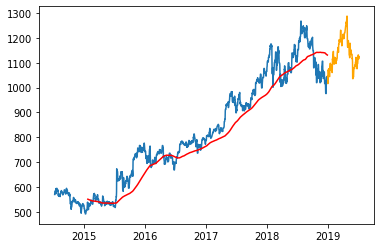

In [ ]:
# média móvel dos últimos 200 dias
moving_avg = train_ts.rolling(window=200).mean()
plt.plot(train_ts)
plt.plot(moving_avg, color='red')
plt.plot(test_ts, color='orange')

#### 4.1.4. Decomposição Clássica

A decomposição é usada principalmente para análise de séries temporais e, como uma ferramenta de análise, pode ser usada para informar os modelos de previsão sobre o seu problema.

Ele fornece uma maneira estruturada de pensar sobre um problema de previsão de série temporal, geralmente em termos de complexidade de modelagem e, especificamente, em termos de como melhor capturar cada um desses componentes em um determinado modelo.

A biblioteca `statsmodels` fornece uma implementação do método de decomposição clássica, em uma função chamada
`seasonal_decomposição`. Requer que você especifique se o modelo é aditivo ou multiplicativo.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


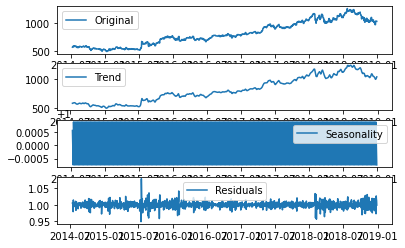

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# cria modelo
decomposition = seasonal_decompose(train_ts, model='multiplicative')

# define componentes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# plots
plt.subplot(411)
plt.plot(train_ts, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

#### 4.1.5. Amortecimento Exponencial

O amortecimento exponencial é um método de previsão de série temporal para dados univariados que pode ser estendido para dar suporte a dados com uma tendência sistemática ou componente sazonal.

> As previsões produzidas usando métodos de amortecimento exponencial são médias ponderadas de observações anteriores, com os pesos decaindo exponencialmente à medida que as observações envelhecem. Em outras palavras, quanto mais recente a observação, maior o peso associado.

— Página 171, [Forecasting: principles and practice](https://amzn.to/2xlJsfV), 2013.

In [ ]:
# importa biblioteca
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# cria classe
expsmoothing = ExponentialSmoothing(train_ts)

# fit do modelo
expsmoothing_fit = expsmoothing.fit()

# previsao
expsmoothing_yhat = expsmoothing_fit.predict(test_ts.index[0], test_ts.index[-1])

In [ ]:
expsmoothing_yhat

2019-01-01    1035.609985
2019-01-02    1035.609985
2019-01-03    1035.609985
2019-01-04    1035.609985
2019-01-05    1035.609985
                 ...     
2019-04-07    1035.609985
2019-04-08    1035.609985
2019-04-09    1035.609985
2019-04-10    1035.609985
2019-04-11    1035.609985
Freq: D, Length: 101, dtype: float64

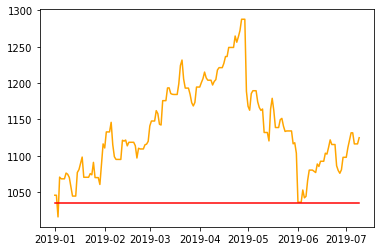

In [ ]:
# plot dos resultados
plt.plot(test_ts, color='orange')
plt.plot(expsmoothing_yhat, color='red')

In [ ]:
# dataset para medir erro
exp_forecast = pd.concat([train_ts.append(test_ts),
                          expsmoothing_yhat.rename('yhat')], axis=1, sort=False)

exp_forecast.tail()

,y,yhat
Date,,
2019-07-05,1131.589966,1035.609985
2019-07-06,1116.349976,1035.609985
2019-07-07,1116.349976,1035.609985
2019-07-08,1116.349976,1035.609985
2019-07-09,1124.829956,1035.609985


In [ ]:
# função reutilizável para cálculo de erros
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [ ]:
# métricas de erro
for err_name, err_value in calculate_forecast_errors(exp_forecast, len(test_ts)).items():
    print(err_name, err_value)

MAPE 8.678738937720926
MAE 101.4019628421052


#### 4.1.6. ARIMA

O Autoregressive Integrated Moving Average (ARIMA) modela a previsão como uma função linear das observações diferenciadas e erros residuais em observações anteriores.

Ele combina os modelos de Autorregressão (AR) e Média Móvel (MA), bem como uma etapa de pré-processamento de diferenciação da sequência para tornar a sequência estacionária, chamada integração (I).

In [ ]:
# imports
from statsmodels.tsa.arima_model import ARIMA

# fit do modelo
ar_model = ARIMA(train_ts, order=(1, 1, 1))
ar_fit = ar_model.fit(disp=False)

# previsão
ar_yhat = ar_fit.predict(test_ts.index[0], test_ts.index[-1], typ='levels')

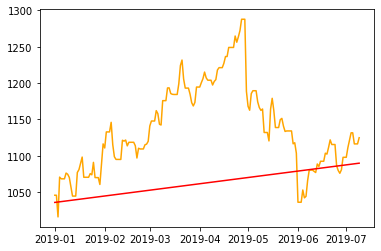

In [ ]:
# plot results
plt.plot(test_ts, color='orange')
plt.plot(ar_yhat, color='red')

In [ ]:
# dataset para medir erro
arima_forecast = pd.concat([train_ts.append(test_ts),
                            ar_yhat.rename('yhat')], axis=1, sort=False)

arima_forecast.tail()

,y,yhat
Date,,
2019-07-05,1131.589966,1088.719932
2019-07-06,1116.349976,1089.005170
2019-07-07,1116.349976,1089.290408
2019-07-08,1116.349976,1089.575646
2019-07-09,1124.829956,1089.860884


In [ ]:
# métricas de erro
for err_name, err_value in calculate_forecast_errors(arima_forecast, len(test_ts)).items():
    print(err_name, err_value)

MAPE 6.563933779576808
MAE 77.04669292606819


#### 4.1.7. Prophet

Como mencionado acima, o Prophet é uma ferramenta que foi construída para lidar com essas questões e fornece uma abordagem prática para previsões “em escala”. Ele pretende automatizar os recursos comuns de séries temporais de negócios, fornecendo métodos simples e ajustáveis. O Prophet permite que os analistas, com uma variedade de experiências, façam mais previsões do que manualmente.

O pacote `Prophet` possui algumas maneiras específicas de lidar com os dados. Por exemplo, os dados de entrada podem ter apenas duas colunas chamadas `ds` e `y`.

In [ ]:
# ajuste do dataset de treino
train_prophet = train_ts.reset_index()
train_prophet.columns = ['ds', 'y']
train_prophet.head()

,ds,y
0,2014-07-10,569.536316
1,2014-07-11,577.594238
2,2014-07-12,583.268616
3,2014-07-13,583.268616
4,2014-07-14,583.268616


In [ ]:
# adjust do dataset de teste
test_prophet = test_ts.reset_index()
test_prophet.columns = ['ds', 'y']
test_prophet.head()

,ds,y
0,2019-01-01,1045.849976
1,2019-01-02,1045.849976
2,2019-01-03,1016.059998
3,2019-01-04,1070.709961
4,2019-01-05,1068.390015


In [ ]:
# imports
from fbprophet import Prophet

In [ ]:
# instancia prophet e treina
m = Prophet()
m.fit(train_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# construção do dataset de teste para alimentar o modelo
future = m.make_future_dataframe(periods=len(test_prophet))

# realiza previsão
forecast = m.predict(future)

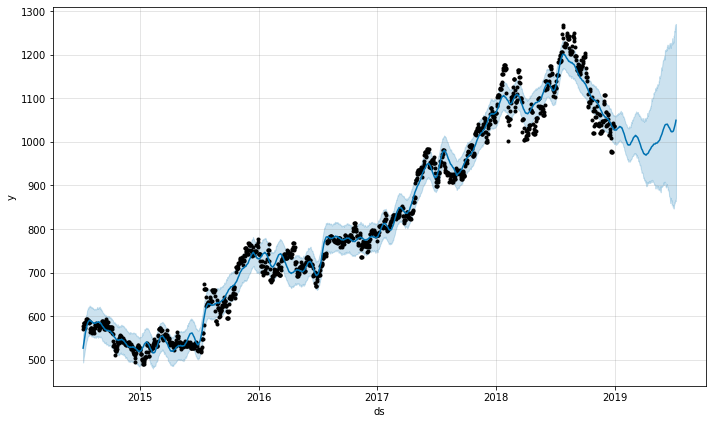

In [ ]:
# plot dos resultados
m.plot(forecast);

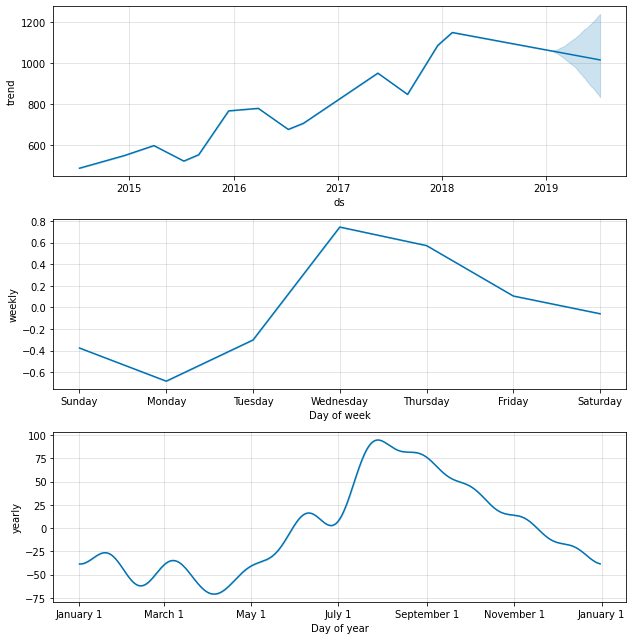

In [ ]:
# plot das componentes da série
m.plot_components(forecast);

In [ ]:
# função para construir dataset com valores históricos e previsão realizada
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [ ]:
# usa função para construir dataset
prophet_forecast = make_comparison_dataframe(train_prophet.append(test_prophet), forecast)

prophet_forecast.tail()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2019-07-05,1034.969029,862.335208,1252.809521,1131.589966
2019-07-06,1038.056639,860.372360,1268.097278,1116.349976
2019-07-07,1041.302952,865.553815,1258.954808,1116.349976
2019-07-08,1044.832143,864.069108,1270.519330,1116.349976
2019-07-09,1049.276231,871.528885,1269.880177,1124.829956


In [ ]:
# cálculo de erros
for err_name, err_value in calculate_forecast_errors(prophet_forecast, len(test_ts)).items():
    print(err_name, err_value)

MAPE 10.959555309432357
MAE 128.1155924361191


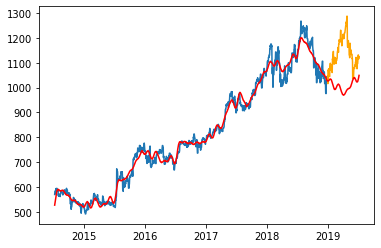

In [ ]:
# plot dos resultados
plt.plot(train_ts)
plt.plot(test_ts, color='orange')
plt.plot(prophet_forecast['yhat'], color='red')

Que modelo você usaria? ARIMA, Amortecimento Exponencial ou os recursos do `Prophet`?

### 4.2. Métodos de Machine Learning

Até agora, aprendemos como realizar uma previsão apenas analisando os padrões da própria série temporal. No entanto, se a série temporal que você deseja prever é fortemente influenciada por fatores externos (expressos na forma de variaveis causais), você deve utilizar outras técnicas que consigam levar em consideração essas relações de causalidade. Caso você tenha esquecido da diferença entre causalidade e correlação:


* **Correlação**: refere-se ao grau de associação entre duas variáveis aleatórias. Portanto, a correlação entre dois conjuntos de dados é o quanto eles se parecem. por exemplo: como o preço da ação de hoje está associada à de ontem?
* **Causalidade**: implica que A e B têm uma relação de causa e efeito um com o outro. Você está dizendo que A causa B. Por exemplo: como o crescimento da população afeta o preço da ação do google?

#### 4.2.1. Métodos baseados em árvore

Vamos pegar nosso exemplo de conjunto de dados de série temporal para aplicar um modelo de floresta aleatório (Random Forest), assim como fizemos na última aula, e ver como ele funciona.

Vamos considerar o seguinte problema: você foi convidado por uma empresa de transporte queniana para construir um modelo para prever quantos passageiros vão estar em cada viagem de ônibus com destino a Nairóbi em sua programação.

Este é um concurso real de ciência de dados da [Zindi] (https://zindi.africa/competitions/traffic-jam-predicting-peoples-movement-into-nairobi), uma plataforma de competição de ciência de dados com a missão de construir um ecossistema de ciência de dados na África. O dois conjuntos de dados usados neste notebook estão na pasta /data:

- [Nairobi Raw] 
- [Nairóbi Treated]

O dataset inicial fornecido pela companhia é o seguinte:

In [ ]:
# imports de blibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# carga dos dados
nairobi_raw = pd.read_csv("/content/drive/My Drive/Aula 5 ADP/data/nairobi_raw.csv", delimiter = ";", decimal = ",")
print(nairobi_raw.shape)
nairobi_raw.head()

(51645, 7)


,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,17/10/2017,07:15,Migori,Nairobi,Bus,49
1,14304,14/11/2017,05:10,Kisii,Nairobi,Bus,49
2,5437,19/11/2017,07:12,Migori,Nairobi,Bus,49
3,5710,26/11/2017,07:05,Keroka,Nairobi,Bus,49
4,5777,27/11/2017,07:10,Homa Bay,Nairobi,Bus,49


Como nosso conjunto de dados claramente não está pronto para ser utilizado por nosso algoritmo de aprendizado de máquina, faremos a preparação de alguns dados nele.

Podemos ver que temos mais de 50 mil observações e 7 variáveis. Mas onde está a variável que devemos prever, a quantidade de passageiros em cada viagem de ônibus? Cada viagem de ônibus tem um ID de viagem e cada observação neste conjunto de dados é o registro de um passageiro que comprou uma passagem para estar naquele ônibus. Portanto, vamos apenas agrupar os passageiros pelo ID da viagem! Problema resolvido? Quase lá.

Vamos remover a variável _travel_to_, pois todas as viagens são para Nairóbi. Além disso, vamos ajudar nosso modelo de árvore de decisão e criar algumas variáveis que indicam 4 intervalos de tempo diferentes para as viagens acontecerem. Esses intervalos foram criados mais ou menos com base na quantidade de viagens em cada hora do dia.

Portanto, este é nosso novo conjunto de dados após alguma transformação:

In [ ]:
# import da base de dados transformada
nairobi_treated = pd.read_csv("/content/drive/My Drive/Aula 5 ADP/data/nairobi_treated.csv", delimiter = ";", decimal = ",")

# vamos definir a data como o indide do dataset
nairobi_treated.index = nairobi_treated['travel_date']
nairobi_treated = nairobi_treated.iloc[:, 1:]

# prints das características do dataset
print(nairobi_treated.shape)
nairobi_treated.head()

(6249, 8)


,5_to_7_am,7_to_8_am,8_to_11_am,7_to_11_pm,bus_origin,car_type,max_capacity,nb_passengers
travel_date,,,,,,,,
17/10/2017,0,1,0,0,Migori,Bus,49,1
14/11/2017,1,0,0,0,Kisii,Bus,49,1
19/11/2017,0,1,0,0,Migori,Bus,49,1
26/11/2017,0,1,0,0,Keroka,Bus,49,1
27/11/2017,1,0,0,0,Kisii,shuttle,11,2


Agora que importamos nosso banco de dados, vamos separar a variável objetivo das demais variávels. Nossa variável objetivo será _nb_passengers_, que é o número de passageiros em cada viagem.

In [ ]:
# separando variável objetivo
X, y = nairobi_treated.iloc[:, :-1], nairobi_treated.iloc[:, -1]

print("X", X.shape)
print(X.head())
print("y", y.shape)
print(y.head)

X (6249, 7)
             5_to_7_am  7_to_8_am  8_to_11_am  ...  bus_origin car_type max_capacity
travel_date                                    ...                                  
17/10/2017           0          1           0  ...      Migori      Bus           49
14/11/2017           1          0           0  ...       Kisii      Bus           49
19/11/2017           0          1           0  ...      Migori      Bus           49
26/11/2017           0          1           0  ...      Keroka      Bus           49
27/11/2017           1          0           0  ...       Kisii  shuttle           11

[5 rows x 7 columns]
y (6249,)
<bound method NDFrame.head of travel_date
17/10/2017     1
14/11/2017     1
19/11/2017     1
26/11/2017     1
27/11/2017     2
              ..
20/04/2018    39
20/04/2018     1
20/04/2018    12
20/04/2018     7
20/04/2018    11
Name: nb_passengers, Length: 6249, dtype: int64>


Como nós temos variáveis categóricas, vamos transformá-las em dummy:

In [ ]:
X = pd.get_dummies(X)
X.columns

Index(['5_to_7_am', '7_to_8_am', '8_to_11_am', '7_to_11_pm', 'max_capacity',
       'bus_origin_Awendo', 'bus_origin_Homa Bay', 'bus_origin_Kehancha',
       'bus_origin_Kendu Bay', 'bus_origin_Keroka', 'bus_origin_Keumbu',
       'bus_origin_Kijauri', 'bus_origin_Kisii', 'bus_origin_Mbita',
       'bus_origin_Migori', 'bus_origin_Ndhiwa', 'bus_origin_Nyachenge',
       'bus_origin_Oyugis', 'bus_origin_Rodi', 'bus_origin_Rongo',
       'bus_origin_Sirare', 'bus_origin_Sori', 'car_type_Bus',
       'car_type_shuttle'],
      dtype='object')

Agora vamos dividir nosso conjunto de dados em conjuntos de treinamento e teste. Definir _shuffle = False_ significa que dividiremos o treinamento e o teste seguindo a ordem das observações, que são classificadas por data.

In [ ]:
# import função train_test_split
from sklearn.model_selection import train_test_split

# usamos a função train_test_split para criar os sets de treino e teste
# define o tamanho do set de teste. Pode ser um inteiro (número de observações) ou então uma fração, correspondendo à proporção treino/teste
# suffle = False significa que a separação obedecerá a sequencia da data
X_training, X_test, y_training, y_test = train_test_split(X, y, 
                                                          test_size = 0.25, 
                                                          shuffle = False)

print("Train set X", X_training.shape)
print("Train set y", y_training.shape)
print("Test set X", X_test.shape)
print("Test set y", y_test.shape)
X_test.head()
X_test_backup = X_test

Train set X (4686, 24)
Train set y (4686,)
Test set X (1563, 24)
Test set y (1563,)


Agora, vamos explorar a técnica de divisão que aprendemos anteriormente nesta lição, usando a função TimeSeriesSplit. Nosso número de divisões será 10 e usaremos todo o histórico disponível para o conjunto de dados de treinamento.

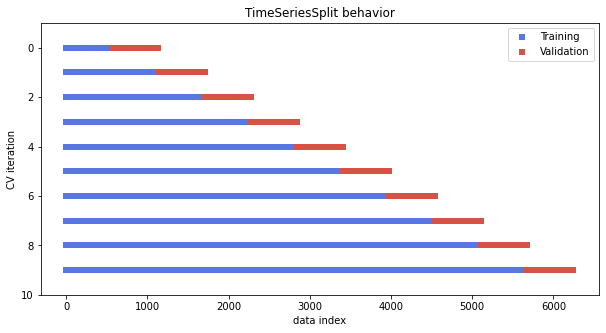

In [ ]:
# using fixed history to train
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit(n_splits=10)

# now plotting our datasets for cross-validation
fig, ax = plt.subplots(figsize=(10, 5))
for index, (X_train, X_test) in enumerate(cv.split(X)):
    # Plot training and test indices
    l1 = ax.scatter(X_train, [index] * len(X_train), c=[plt.cm.coolwarm(.1)], marker='_', lw=6)
    l2 = ax.scatter(X_test, [index] * len(X_test), c=[plt.cm.coolwarm(.9)], marker='_', lw=6)
    ax.set(ylim=[10, -1], title='TimeSeriesSplit behavior', xlabel='data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])

Agora vamos treinar nosso modelo de árvore com _Grid Search_ e a técnica de validação cruzada de divisão de série temporal. Como nosso conjunto de dados é meio grande e o _Grid Search_ demoraria (e demorou), já definimos os melhores parâmetros para você!

In [ ]:
# Importing the libraries we'll use for this model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import (explained_variance_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             mean_squared_log_error,
                             r2_score)
from sklearn.model_selection import GridSearchCV


 Best hyperparameters:
{'max_depth': 10, 'max_features': 3, 'n_estimators': 100}
Average Score on train set: 0.322 +/- 0.067
Average Score on validation set: 0.310 +/- 0.135


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

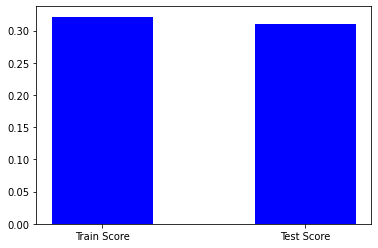

In [ ]:
# Random Forest com Validação cruzada e Grid Search para Séries temporais

# define os valores possíveis para os parâmetros a serem testados
params = {'n_estimators': [100, 500],
          'max_features': [3, 5],
          'max_depth': [5, 10]}

# cria modelo
rf_model_cv_gs = RandomForestRegressor()

# objeto para grid search com GridSearchCV
grid_search = GridSearchCV(rf_model_cv_gs, 
                           param_grid = params, 
                           return_train_score = True, 
                           cv = cv)

# treina modelo com Grid Search
grid_search.fit(X_training, y_training)

# imprime melhor combinação de hiperparâmetros
print('\n Best hyperparameters:')
print(grid_search.best_params_)

# resultados do cv
cv_results = pd.DataFrame(grid_search.cv_results_)

# print score médio nos sets de treino e teste
print("Average Score on train set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_train_score.values[0]))
# print score médio nos sets de validação
print("Average Score on validation set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_test_score.values[0])) 

y = [cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0], 
     cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0]]
x = ["Train Score", "Test Score"]
width = 1/2
plt.bar(x, y, width, color="blue")  

# seta melhor opção baseada nos hiperparâmetros
# utiliza as melhores opções de hiperparâmetros encontrados
rf_model_cv_gs.set_params(n_estimators = grid_search.best_params_['n_estimators'],
                           max_features = grid_search.best_params_['max_features'],
                           max_depth = grid_search.best_params_['max_depth'])

# treina modelo com os melhores hiperparâmetros
rf_model_cv_gs.fit(X_training, y_training)

Vamos calcular o MAE para treino e teste:

In [ ]:
print("MAE train:", mean_absolute_error(y_training, rf_model_cv_gs.predict(X_training)))
print("MAE test:", mean_absolute_error(y_test, rf_model_cv_gs.predict(X_test_backup)))

MAE train: 4.351654557228761
MAE test: 5.186679646250343


###5. Exercício

O conjunto de dados abaixo origina-se originalmente de um desafio de recrutamento do Walmart, que pode ser acessado [aqui](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data). Ele contém vendas anônimas por departamento para 45 lojas Walmart, bem como recursos de apoio.

O exercício proposto é para prever as vendas semanais. Utilize o modelo de machine learning 'Random Forest'

####Parte 1: Pré processamento de Dados [30 pontos]
**Pontuação**
* **0 pontos**: o aluno não faz o exercício ou não responde a questão perguntada
* **15 pontos**: o aluno faz parcialmente as transformações (ex: esquece de transformar uma das colunas de data) e/ou esquece de fazer a limpeza dos dados
* **30 pontos**: o aluno faz todas as transformações de dados cabíveis e também a limpeza

In [ ]:
# Importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Now importing our database
walmart = pd.read_csv("/content/drive/My Drive/Aula 5 ADP/data/walmart_sales.csv")

# show shape and head
print(walmart.shape)
walmart.head()

(282451, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [ ]:
# transforming the Date variable (str) to a date interval (int)
walmart['Date'] =  pd.to_datetime(walmart['Date'], format='%Y-%m-%d')
walmart['days_from'] = walmart['Date'] - min(walmart['Date'])
walmart.days_from = walmart.days_from.dt.days

walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282451 entries, 0 to 282450
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         282451 non-null  int64         
 1   Dept          282451 non-null  int64         
 2   Date          282451 non-null  datetime64[ns]
 3   Weekly_Sales  282451 non-null  float64       
 4   IsHoliday     282451 non-null  bool          
 5   Temperature   282451 non-null  float64       
 6   Fuel_Price    282451 non-null  float64       
 7   MarkDown1     100520 non-null  float64       
 8   MarkDown2     74232 non-null   float64       
 9   MarkDown3     91521 non-null   float64       
 10  MarkDown4     90031 non-null   float64       
 11  MarkDown5     101029 non-null  float64       
 12  CPI           282451 non-null  float64       
 13  Unemployment  282451 non-null  float64       
 14  Type          282451 non-null  object        
 15  Size          282

In [ ]:
# check for NaN
walmart.isna().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
Temperature     False
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4        True
MarkDown5        True
CPI             False
Unemployment    False
Type            False
Size            False
days_from       False
dtype: bool

In [ ]:
# Replace NaNs with zeros
walmart = walmart.fillna(0)

In [ ]:
# Separating our target variable
X = walmart.drop(['Weekly_Sales', 'Date'], axis=1)
y = walmart.iloc[:, walmart.columns == "Weekly_Sales"]

In [ ]:
# Creating Dummies
X = pd.get_dummies(X)
X.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size', 'days_from', 'Type_A', 'Type_B', 'Type_C'],
      dtype='object')

####Parte 2: Separação de Sets de Treino e Teste [20 pontos]
**Coreção Binária**: O aluno recebe todos os pontos caso faça o split, caso contrário, recebe zero.

In [ ]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# use train_test_split function to create test set
# test_size defines the test set size and can be an integer as the number of observations or a proportion of it
# setting shuffle = False means that we'll split train and test following the date.
X_training, X_test, y_training, y_test = train_test_split(X, y, 
                                                          test_size = 0.25, 
                                                          shuffle = False)

In [ ]:
# using fixed history to train
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit(n_splits=10)

####Parte 3: Construção do modelo e resultados [50 pontos]
**Pontuação**
* **0 pontos**: o aluno não faz o exercício ou não responde a questão perguntada
* **25 pontos**: o aluno criou o modelo e treinou-o porém não definiu os melhores parâmetros com gridsearch
* **50 pontos**: o aluno criou o modelo e treinou-o cos melhores hiperparâmetros

In [ ]:
# Importing the libraries we'll use for this model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import (explained_variance_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             mean_squared_log_error,
                             r2_score)
from sklearn.model_selection import GridSearchCV

In [ ]:
# Random Forest with Time Series Split Cross Validation and Grid Search

# define the possible values of each parameters to be tested
params = {'n_estimators': [10, 50],
          'max_features': [3, 10],
          'max_depth': [5, 10]}


# create model object with XGBClassifier
rf_model_cv_gs = RandomForestRegressor()

# create grid search object with GridSearchCV
grid_search = GridSearchCV(rf_model_cv_gs, 
                           param_grid = params, 
                           return_train_score = True, 
                           cv = cv)

# train the model with grid search
grid_search.fit(X_training, y_training)

# print best hyperparameters combination
print('\n Best hyperparameters:')
print(grid_search.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 


 Best hyperparameters:
{'max_depth': 10, 'max_features': 10, 'n_estimators': 50}


In [ ]:
# get cv_results
cv_results = pd.DataFrame(grid_search.cv_results_)

# print average Score on train sets
print("Average Score on train set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_train_score.values[0]))
# print average Score on validation sets
print("Average Score on validation set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
                                                                     cv_results[cv_results.rank_test_score == 1].std_test_score.values[0])) 

y = [cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0], 
     cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0]]
x = ["Train Score", "Test Score"]

# set the best option for the parameters
rf_model_cv_gs.set_params(n_estimators = grid_search.best_params_['n_estimators'],
                           max_features = grid_search.best_params_['max_features'],
                           max_depth = grid_search.best_params_['max_depth'])

# train a model using the best parameters
rf_model_cv_gs.fit(X_training, y_training)

Average Score on train set: 0.858 +/- 0.007
Average Score on validation set: 0.832 +/- 0.014


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print("MAE train:", mean_absolute_error(y_training, rf_model_cv_gs.predict(X_training)))
print("MAE test:", mean_absolute_error(y_test, rf_model_cv_gs.predict(X_test)))

MAE train: 5048.689789569683
MAE test: 5132.533387969805


## Aprofundamento

- [Forecasting: Principles and Practice](https://otexts.com/fpp3/)
- [Time Series Databases are Exploding in Popularity](https://www.techrepublic.com/article/why-time-series-databases-are-exploding-in-popularity/)
- [Application of Different Long Short-Term Memory Algorithms](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)
- [How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424)
- [Applied Forecasting for Business and Economics](https://robjhyndman.com/teaching/)
- [Time Series Forecast: A Basic Introduction Using Python](https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000)
- [Time Series Forecast with Prophet](https://towardsdatascience.com/time-series-forecasting-with-prophet-54f2ac5e722e)
- [Facebook Prophet Webpage](https://research.fb.com/prophet-forecasting-at-scale/)
- [How to Rock Your Next Time Series Forecasting Project](https://medium.com/free-code-camp/how-to-rock-your-next-time-series-forecasting-project-3930d589f704)
- [An End-to-end Project on Time Series Forecasting](https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b)